# The Challenge

Build a predictive model that answers the question: "what sorts of people were more likely to survive the Titanic sinnking?"

In [315]:
import pandas as pd
import numpy as np

In [316]:
df = pd.read_csv("Data/train.csv")

In [317]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## Feature Engineer

### Title Feature

In [318]:
import string
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if str.find(big_string, substring) != -1:
            return substring
    return np.nan

title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
            'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
            'Don', 'Jonkheer']

df['Title']=df['Name'].map(lambda x: substrings_in_string(x, title_list))

In [319]:
#replacing all titles with mr, mrs, miss, master
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
    
df['Title']=df.apply(replace_titles, axis=1)

### Cabin Feature

In [320]:
df['Cabin'] = df['Cabin'].astype('str')
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
df['Deck']=df['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))
df.Deck[df.Deck.isnull()] = 'O'

C:\Users\Alysson\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### Family Size

In [321]:
#Creating new family_size column
df['Family_Size']=df['SibSp']+df['Parch'] + 1

## Putting Survived Column to the end

In [322]:
cols = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Deck',
       'Family_Size','Survived']

df = df.ix[:, cols]

C:\Users\Alysson\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [323]:
df.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked Title  \
0    male  22.0      1      0         A/5 21171   7.2500   nan        S    Mr   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   Mrs   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   nan        S  Miss   
3  female  35.0      1      0            113803  53.1000  C123        S   Mrs   
4    male  35.0      0      0            373450   8.0500   nan        S    Mr   

  Deck  Family_Size  Survived  
0    O            2         0  
1    C            2         1  
2    O            1         1  
3    C            2         1  
4    O            1         0

## Preprocessing

In [324]:
dfx = df[['Pclass','Sex','Age','Fare','Embarked','Title', 'Deck', 'Family_Size', 'Survived']]
dfx.head()

Pclass     Sex   Age     Fare Embarked Title Deck  Family_Size  Survived
0       3    male  22.0   7.2500        S    Mr    O            2         0
1       1  female  38.0  71.2833        C   Mrs    C            2         1
2       3  female  26.0   7.9250        S  Miss    O            1         1
3       1  female  35.0  53.1000        S   Mrs    C            2         1
4       3    male  35.0   8.0500        S    Mr    O            1         0

## Analysing Distributions

In [355]:
import matplotlib.pyplot as plt
import seaborn as sns

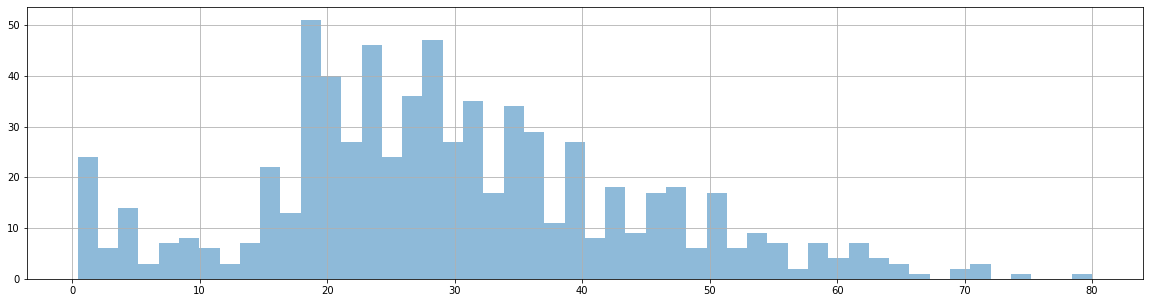

In [374]:
fig= plt.figure(figsize=(20,5))
dfx.Age.hist(bins=50, alpha=0.5)
#fig= plt.figure(figsize=(10,10))
#fig.set_facecolor('xkcd:white')

## Tratando idade com Null Values

In [280]:
mean = df['Age'].mean()
dfx.Age[dfx.Age.isnull()] = mean

C:\Users\Alysson\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Alysson\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Alysson\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [281]:
mean = df['Fare'].mean()
dfx.Fare[dfx.Fare.isnull()] = mean

C:\Users\Alysson\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [282]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
Family_Size    891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
Title          891 non-null object
Survived       891 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [283]:
dfx.drop(dfx.loc[  
               (dfx.Embarked.isnull())].index, inplace = True)

C:\Users\Alysson\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Encoding

In [308]:
#dfx.head()
dfy = dfx.iloc[:, :-1]
#dfy = dfx
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
Family_Size    889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
Title          889 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 55.6+ KB


In [309]:
dfy['AgeGroup'] = 'NaN'
dfy['AgeGroup'][dfy.Age <= 5] = 'Baby'
dfy['AgeGroup'][(dfy.Age > 5) & (dfy.Age <= 10)] = 'Children'
dfy['AgeGroup'][(dfy.Age > 10) & (dfy.Age <= 17)] = 'Adolescent'
dfy['AgeGroup'][(dfy.Age > 17) & (dfy.Age <= 25)] = 'Young'
dfy['AgeGroup'][(dfy.Age > 25) & (dfy.Age <= 40)] = 'Adult'
dfy['AgeGroup'][(dfy.Age > 40) & (dfy.Age <= 60)] = 'Senior'
dfy['AgeGroup'][dfy.Age > 60] = 'Old'
dfy= dfy.drop('Age',axis='columns')

C:\Users\Alysson\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Alysson\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Alysson\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Alysson\Anacon

In [303]:
dfy['family_size'] = 'NaN'
dfy['family_size'][dfy.Family_Size == 0] = 'Alone'
dfy['family_size'][dfy.Family_Size == 1] = 'With Someone'
dfy['family_size'][(dfy.Family_Size > 1) & (dfy.Family_Size <= 3)] = 'Small Family'
dfy['family_size'][(dfy.Family_Size > 3) & (dfy.Family_Size <= 5)] = 'Mid Family'
dfy['family_size'][(dfy.Family_Size > 5)] = 'big family'
dfy= dfy.drop('Family_Size',axis='columns')

C:\Users\Alysson\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Alysson\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Alysson\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Alysson\Anacon

In [310]:
dfy = pd.get_dummies(dfy,drop_first=True)
dfy.head()

Pclass  Family_Size     Fare  Sex_male  Embarked_Q  Embarked_S  Title_Miss  \
0       3            1   7.2500         1           0           1           0   
1       1            1  71.2833         0           0           0           0   
2       3            0   7.9250         0           0           1           1   
3       1            1  53.1000         0           0           1           0   
4       3            0   8.0500         1           0           1           0   

   Title_Mr  Title_Mrs  AgeGroup_Adult  AgeGroup_Baby  AgeGroup_Children  \
0         1          0               0              0                  0   
1         0          1               1              0                  0   
2         0          0               1              0                  0   
3         0          1               1              0                  0   
4         1          0               1              0                  0   

   AgeGroup_Old  AgeGroup_Senior  AgeGroup_Young  
0             0                0               1  
1             0                0               0  
2             0                0               0  
3             0                0               0  
4             0                0               0

In [311]:
data = pd.get_dummies(dfy.Pclass,prefix_sep="_", columns=[['a','b','c']])
data.columns = ['Pclass_1', 'Pclass_2', 'Pclass_3']
dfy= dfy.drop('Pclass',axis='columns')
dfy['Pclass_1'] = data['Pclass_1'].to_list()
dfy['Pclass_2'] = data['Pclass_2'].to_list()
dfy['Pclass_3'] = data['Pclass_3'].to_list()

## Split features and class

In [312]:
X = dfy.iloc[:, :].values
y = dfx.iloc[:, -1].values

In [313]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [214]:
#X = dfx.iloc[:, :].values

# Models and Results

In [314]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

classifiers = [
    ('SVC',SVC()),
    ('Linear SVC', LinearSVC()),
    ('logistic', LogisticRegression(random_state = 0)),
    ('GaussianNB', GaussianNB()),
    ('BernoulliNB', BernoulliNB()),
    ('MultinomialNB', MultinomialNB()),
    ('DecisionTree', DecisionTreeClassifier())
]

results = {}

for name, model in classifiers:
    if name == 'SVC':
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        r = accuracy_score(y_test, y_pred)
        results['SVC'] = r
    elif name == 'Linear SVC':
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        r = accuracy_score(y_test, y_pred)
        results['Linear SVC'] = r
    elif name == 'logistic':
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        r = accuracy_score(y_test, y_pred)
        results['logistic'] = r
    elif name == 'GaussianNB':
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        r = accuracy_score(y_test, y_pred)
        results['GaussianNB'] = r
    elif name == 'BernoulliNB':
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        r = accuracy_score(y_test, y_pred)
        results['BernoulliNB'] = r
    elif name == 'MultinomialNB':
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        r = accuracy_score(y_test, y_pred)
        results['MultinomialNB'] = r
    elif name == 'DecisionTree':
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        r = accuracy_score(y_test, y_pred)
        results['DecisionTree'] = r

results

C:\Users\Alysson\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Alysson\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Alysson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'SVC': 0.8314606741573034,
 'Linear SVC': 0.8033707865168539,
 'logistic': 0.848314606741573,
 'GaussianNB': 0.8202247191011236,
 'BernoulliNB': 0.8202247191011236,
 'MultinomialNB': 0.7640449438202247,
 'DecisionTree': 0.8146067415730337}

In [219]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
#classifier = DecisionTreeClassifier()
classifier = LogisticRegression(random_state = 0)
classifier.fit(X,y)

C:\Users\Alysson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

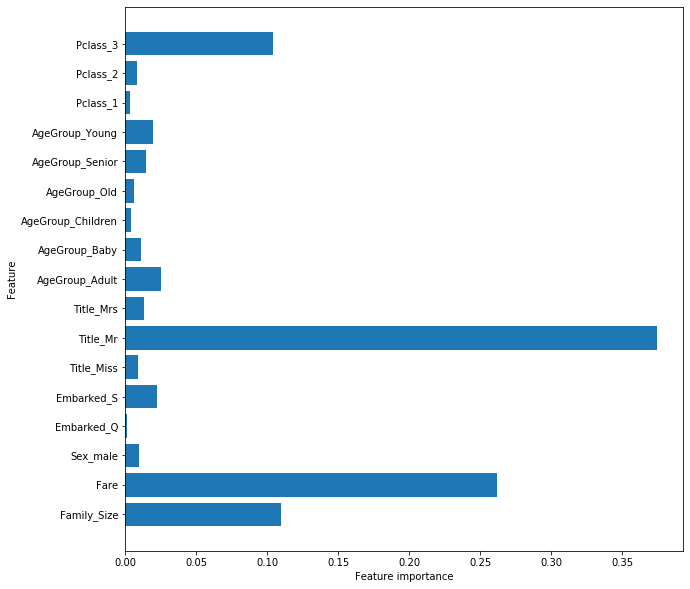

In [218]:
import matplotlib.pyplot as plt

def plot_feature_importances_cancer(model):
    n_features = list(dfy.columns)
    fig= plt.figure(figsize=(10,10))
    fig.set_facecolor('xkcd:white')
    plt.barh(range(len(n_features)), model.feature_importances_, align='center')
    plt.yticks(np.arange(len(n_features)), list(dfy.columns))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()
plot_feature_importances_cancer(classifier)

In [246]:
y_pred = classifier.predict(X)

In [222]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y, y_pred)
print(cm)
accuracy_score(y, y_pred)

[[486  63]
 [ 92 248]]


0.8256467941507312

In [223]:
df = pd.read_csv("Data/test.csv")

In [247]:
df["Survived"] = y_pred

In [248]:
df.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked Title Deck  \
0  34.5      0      0   330911   7.8292   nan        Q    Mr    O   
1  47.0      1      0   363272   7.0000   nan        S   Mrs    O   
2  62.0      0      0   240276   9.6875   nan        Q    Mr    O   
3  27.0      0      0   315154   8.6625   nan        S    Mr    O   
4  22.0      1      1  3101298  12.2875   nan        S   Mrs    O   

   Family_Size  Survived  
0            0         0  
1            1         1  
2            0         0  
3            0         0  
4            2         1

In [249]:
df_final = df[["PassengerId", "Survived"]]

In [250]:
df_final.to_csv('titanic_logistic.csv', index=False)